## Linear regression

General form:

$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3 + ... + \beta_nx_n$

$\beta_0$ - the bias term (value of y when all features are equal to zero);

Model that assumes linear relationship between independent variables (X) and output (depenedent variable, y).
Linear regression refers to any approach for finding this relationship.

**NOTE** - model is still considered to be linear if $x^n$, where $n>1$ (because it is x that's raised to the power, not the coeficients).

If there's single x method is called _simple linear regression_ ($y=\alpha+\beta x$), when there're multiple input variables - _multiple linear regression_ (not to be confused with _multivariate regression_ where there're multiple dependent variables ($y_1, ..., y_n$)).

Optimization methods:
- Ordinary Least Squares (numerical approach, only for linear regression);
- Gradient Descent (analytical approach, universal for other types of problems, for most of the linear regression problems there's single solution (i.e. single minima));

### Ordinary Least Squares

Coeficients found by minimizing sum of squared residuals (SSE):

$SSE=\sum_{i=1}^n(y - y_i)^2$, where $y_i=\alpha+\beta x$

Minimization for _simple linear regression_ ($y=\alpha+\beta x$): 
1. find partial derivatives with respect to $\alpha$ and $\beta $;
2. set them to 0 (sicne derivative is zero at stationary points);
3. solve for $\alpha$ and $\beta$;

Result:

$\alpha=\hat{y}-\beta\hat{x}$ ($\hat{y}$, $\hat{x}$ - means)

$\beta=\frac{\sum_{i=1}^{n}(y_i-\hat{y})(x_i-\hat{x})}{\sum_{i=1}^{n}(x_i-\hat{x})^2}$

Implementation - **sklearn.linear_model.LinearRegression()**

General formula for sollving $y=\beta_0+\sum_{i=1}^{n}\beta_ix_i$ for minimal $\beta$:

$\beta=(X^TX)^{-1}X^Ty$ (here $\beta$ - vector of the coeficients)

In [1]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import pandas as pd

diabetes = datasets.load_diabetes()
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2] # bmi data

152.1334841628967
[949.43526038]


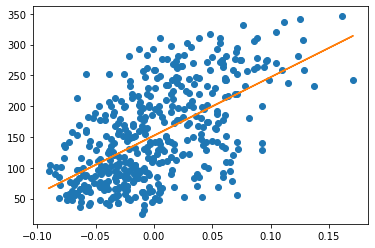

In [3]:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X, diabetes_y)

print(regr.intercept_)
print(regr.coef_)

plt.plot(diabetes_X, diabetes_y, 'o')
plt.plot(diabetes_X, regr.intercept_ + diabetes_X*regr.coef_)
plt.show()

### Gradient Descent

Aims to minimize cost function by iterations. Cost function:

$cost = \frac{1}{2m}\sum_{i=1}^{m}(y-y_i)^2 = \frac{1}{2m}\sum_{i=1}^{m}(\alpha+\beta x_i-y_i)^2$

(which is $\frac{1}{2}\cdot MSE$, where $\frac{1}{2}$ added to simplify equation when calculating derivatives ($(x^2)'=2x$). Note that multiplying the cost function by a scalar does not affect the location of its minimum).

First let's update cost f-tion notation to more common one for GD:

$J(\theta_0, \theta_1)=\frac{1}{2m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})^2=\frac{1}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1 x^{(i)} -y^{(i)})^2$

Then calculate partial derivatives (partial derviative represent change of the function as the variable changes):

$\frac{\partial}{\partial \theta_0}(\frac{1}{2m}\sum_{i=1}^{m}(\theta_0 + \theta_1 x^{(i)} -y^{(i)})^2)=\frac{1}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1 x^{(i)} -y^{(i)}))$

$\frac{\partial}{\partial \theta_1}(\frac{1}{2m}\sum_{i=1}^{m}(\theta_0 + \theta_1 x^{(i)} -y^{(i)})^2)=\frac{1}{m}\sum_{i=1}^{m}x^{(i)}(\theta_0 + \theta_1 x^{(i)} -y^{(i)}))$

Then we try to find minimal values of $\theta_0$ and $\theta_1$ by iterating until convergence (or for some predefined # of iterations):

$\theta_0:=\theta_0-\alpha \frac{\partial J(\theta_0, \theta_1)}{\partial \theta_0}$

$\theta_1:=\theta_1-\alpha \frac{\partial J(\theta_0, \theta_1)}{\partial \theta_1}$

here $\alpha$ - learning rate.

Existing implementation - **sklearn.linear_model.SGDRegressor** (_Stochastic_ Gradient Descent) 

_Stochastic Gradient Descent_ - In Stochastic Gradient Descent, we use one example or one training sample at each iteration instead of using whole dataset to sum all for every steps

In [4]:
# SGD for one independent variable
def SGD(X, y, theta0, alpha, num_iterations):
    theta = theta0
    m = len(X)
    
    for _ in range(num_iterations):
        h = theta0 + theta*X
        theta0 = theta0 - alpha*((1/m)*sum(h-y))
        theta = theta - alpha*((1/m)*sum(X*(h-y)))
        
    return theta0, theta

theta0, theta1 = SGD(diabetes_X[:,0], diabetes_y, 0, 0.01, 70_000)
print(theta0)
print(theta1)

152.13348416289514
754.6029927768063


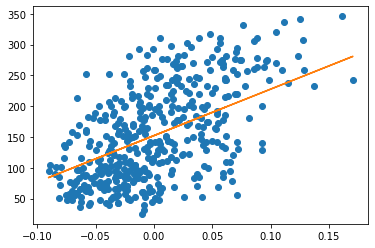

In [5]:
plt.plot(diabetes_X[:,0], diabetes_y, 'o')
plt.plot(diabetes_X[:,0], theta0 + diabetes_X*theta1)
plt.show()

[152.10960555]
[613.14687381]


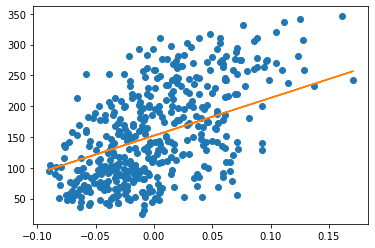

In [6]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

sgd_reg = SGDRegressor(max_iter=100_000, tol=1e-2, alpha=0.001)
sgd_reg.fit(diabetes_X, diabetes_y.reshape(len(diabetes_y),))

print(sgd_reg.intercept_)
print(sgd_reg.coef_)

plt.plot(diabetes_X, diabetes_y, 'o')
plt.plot(diabetes_X, sgd_reg.intercept_ + diabetes_X*sgd_reg.coef_)
plt.show()

### Before linear regression

1. Check if the relationship is linear;

2. Remove noise;

3. Remove collinearity - otherwise model will over-fit your data;

4. Check for Gaussian distribution - it's not strictly necessary, but linear regression will make better perdiction if data is normally distributed. You may transform your data to better fit Gaussian distribution;

5. Standartize data - predictions will be more reliable and in the case of GD it will converge quicker;